In [62]:
import pandas as pd
from sklearn.linear_model import LinearRegression

data = pd.read_excel("GOC-2010.xlsx")
data2 = pd.read_excel("GOC-2011.xlsx")

data = pd.concat([data, data2])


In [63]:
table = data[["DATE", "HOUR", "BECK1"]]

In [64]:
#table.loc[table['BECK1'] < 100]

In [65]:
table['day_of_year'] = table['DATE'].dt.dayofyear

C:\Users\Charles\AppData\Local\Temp\ipykernel_15460\2411859821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['day_of_year'] = table['DATE'].dt.dayofyear


In [66]:
table = table.dropna()
print(table)

           DATE  HOUR  BECK1  day_of_year
0    2010-01-01   1.0  269.0          1.0
1    2010-01-01   2.0  248.0          1.0
2    2010-01-01   3.0  124.0          1.0
3    2010-01-01   4.0   88.0          1.0
4    2010-01-01   5.0  300.0          1.0
...         ...   ...    ...          ...
8755 2011-12-31  20.0  144.0        365.0
8756 2011-12-31  21.0  136.0        365.0
8757 2011-12-31  22.0  131.0        365.0
8758 2011-12-31  23.0  134.0        365.0
8759 2011-12-31  24.0  133.0        365.0

[17520 rows x 4 columns]


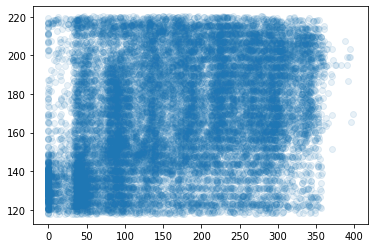

In [67]:
model = LinearRegression()

x = table[['HOUR', 'day_of_year']]
y = table['BECK1']
model.fit(x, y)


import matplotlib.pyplot as plt
plt.scatter(y, model.predict(x), alpha=0.1)

In [68]:
from sklearn.metrics import r2_score
print(r2_score(y, model.predict(x)))

0.09041807675634395


In [69]:
from pygam import LinearGAM
model = LinearGAM()

model.fit(x, y)
plt.scatter(y, model.predict(x), alpha=0.1)

print(r2_score(y, model.predict(x)))

ModuleNotFoundError: No module named 'pygam'

-0.9060054781154161


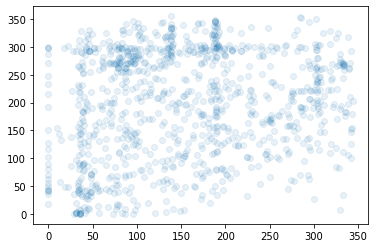

In [ ]:
train_x = x.iloc[:-1000]
train_y = y.iloc[:-1000]
test_x = x.iloc[-1000:]
test_y = y.iloc[-1000:]

model.fit(train_x, train_y)

plt.scatter(test_y, model.predict(test_x), alpha=0.1)
print(r2_score(test_y, model.predict(test_x)))

0.6211273235880554


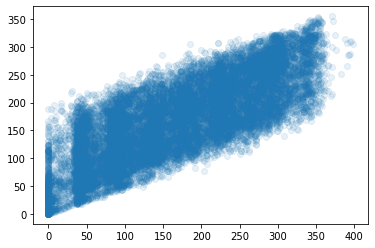

In [ ]:
plt.scatter(train_y, model.predict(train_x), alpha=0.1)
print(r2_score(train_y, model.predict(train_x)))

In [72]:
import PySimpleGUI as sg

sg.Window(title="Hydro Model", layout=[[]], margins=(100, 50)).read()

(None, [])

In [75]:
import matplotlib as mpl
mpl.__version__

'3.6.1'